# Experiment 3
# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


# Read data

In [2]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Description and CustomerID has alot of null values

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Preprocessing
### Data Cleaning I

In [7]:
# Dealing with missing values
df = df.dropna()
df.shape

(406829, 8)

In [8]:
# Dealing with incorrect datatype
df['CustomerID'] = df['CustomerID'].astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
### Data Transformation

In [10]:
# Add additional 'Amount' column

df['Amount'] = df['UnitPrice'] *df['Quantity']
df.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
df = df.reset_index()

In [12]:
# Add additional 'Diff' column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d %H:%M')
df_max = df['InvoiceDate'].max()
df['Diff'] = df_max - df['InvoiceDate']
df['Diff'] = df['Diff'].dt.days
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


### Aggregation

In [13]:
df_amount = df.groupby('CustomerID')['Amount'].sum()
df_amount.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [14]:
# get number of transactions for each customer

df_freq = df.groupby('CustomerID')['InvoiceNo'].count()
df_freq.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [15]:
df_diff = df.groupby('CustomerID')['Diff'].min()
df_diff.head()

CustomerID
12346.0    325
12347.0      1
12348.0     74
12349.0     18
12350.0    309
Name: Diff, dtype: int64

### Feature Extraction

In [16]:
df_agg = pd.merge(df_amount,df_freq,how='inner',on='CustomerID')

df_final = pd.merge(df_agg,df_diff,how='inner',on='CustomerID')
df_final.head()

,Amount,InvoiceNo,Diff
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
Amount       4372 non-null float64
InvoiceNo    4372 non-null int64
Diff         4372 non-null int64
dtypes: float64(1), int64(2)
memory usage: 136.6+ KB


In [18]:
df_final = df_final.rename({'InvoiceNo':'Frequency','Diff':'Recency'},axis=1)
df_final.head()

,Amount,Frequency,Recency
CustomerID,,,
12346.0,0.00,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


### Data Cleaning II

In [19]:
### Outlier removal
Q1 = df_final.Amount.quantile(0.05)
Q3 = df_final.Amount.quantile(0.95)
IQR = Q3-Q1

df_final = df_final[(df_final.Amount >= Q1-1.5*IQR) & (df_final.Amount <= Q3+1.5*IQR)]

Q1 = df_final.Recency.quantile(0.05)
Q3 = df_final.Recency.quantile(0.95)
IQR = Q3-Q1

df_final = df_final[(df_final.Recency >=Q1-1.5*IQR) & (df_final.Recency <= Q3 + 1.5*IQR)]

Q1 = df_final.Frequency.quantile(0.05)
Q3 = df_final.Frequency.quantile(0.95)
IQR = Q3-Q1
df_final = df_final[(df_final.Frequency >= Q1-1.5*IQR) & (df_final.Frequency <= Q3+1.5*IQR)]


In [20]:
### Standardization

from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
df1 = scaler.fit_transform(df_final)
df1

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [43]:
df_f = pd.DataFrame(df1)
df_f.columns = ['Monetary','Frequency','Recency']
df_f.head()

,Monetary,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [48]:
df_f.to_csv('cleaned_online_retail_dataset.csv',row.names=False)

# K-Means Clustring

Text(0.5, 1.0, 'Experiment 3: K-Means Model')

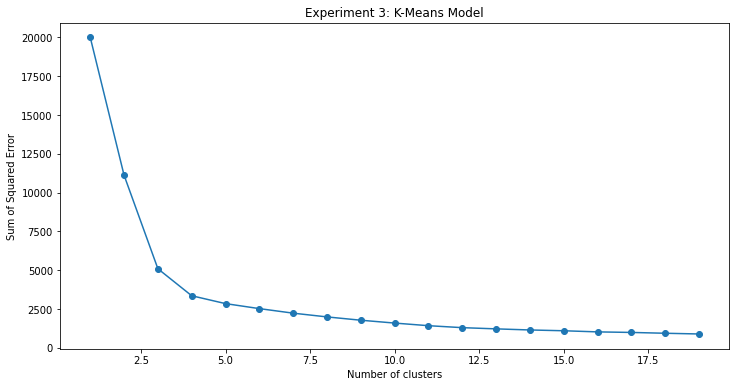

In [41]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2,init = 'k-means++')
kmeans.fit(df_f)

#inertia on the fitted data
kmeans.inertia_

# Checking the ideal number of clusters
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1,n_clusters = cluster,init='k-means++')
    kmeans.fit(df_f)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')  
plt.title('Experiment 3: K-Means Model')

In [23]:
# k-means using 5 clusters and k-means++ initialization

kmeans = KMeans(n_jobs = -1, n_clusters = 4,init='k-means++')
kmeans.fit(df_f)
pred = kmeans.predict(df_f)

frame = pd.DataFrame(df_f)
frame['cluster'] = pred
frame['cluster'].value_counts()

df_final['Label'] = pred
df_final.head()

,Amount,Frequency,Recency,Label
CustomerID,,,,
12346.0,0.00,2,325,3
12347.0,4310.00,182,1,2
12348.0,1797.24,31,74,0
12349.0,1757.55,73,18,0
12350.0,334.40,17,309,3


5 Clusters setting results 3 label

In [42]:
df_segm_analysis = df_final.groupby(['Label']).mean()
df_segm_analysis = df_final.groupby(['Label']).mean()


,Amount,Frequency,Recency
Label,,,
0,688.730638,42.677349,48.412643
1,6649.382884,375.320930,17.855814
2,2691.924602,168.104849,29.560944
3,387.070617,25.515911,251.333655


#### Plotting the various clusters taking 2 features at a time

In [31]:
df_final['Color'] = df_final['Label'].map({0:'#91FF61',
                                  1:'#BA61FF',
                                  2:'#0000FF',
                                  3:'#FF0000'})
df_final.head()

,Amount,Frequency,Recency,Label,Color
CustomerID,,,,,
12346.0,0.00,2,325,3,#FF0000
12347.0,4310.00,182,1,2,#0000FF
12348.0,1797.24,31,74,0,#91FF61
12349.0,1757.55,73,18,0,#91FF61
12350.0,334.40,17,309,3,#FF0000


<AxesSubplot:xlabel='Amount', ylabel='Recency'>

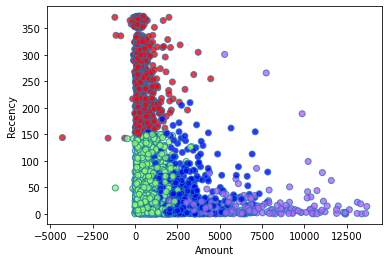

In [32]:
sns.regplot (df_final['Amount'],df_final['Recency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']}) #hue=df_final['Label'],palette = sns.color_palette('hls',4)

<AxesSubplot:xlabel='Amount', ylabel='Frequency'>

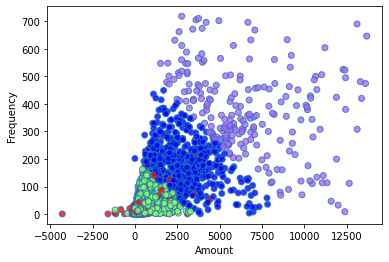

In [45]:
sns.regplot(df_final['Amount'],df_final['Frequency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']})

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

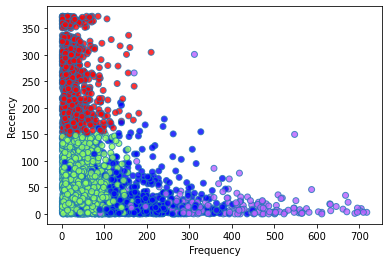

In [34]:
sns.regplot(df_final['Frequency'],df_final['Recency'],fit_reg=False,scatter_kws={'facecolors':df_final['Color']})